In [39]:
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import r2_score

In [40]:
df=pd.read_csv(r'C:\Users\Muslim Aqeel\Downloads\Car-Insurance-Campaign-data.csv')

In [41]:
df

,Age,Gender,Ad set name,Reach,Impressions,Frequency,Result Type,Results,Cost per result,Amount spent (PKR),"CPM (cost per 1,000 impressions)",Link clicks,CPC (cost per link click),CTR (link click-through rate),Reporting starts,Reporting ends
0,25-34,male,Adset Lahore,15354,25607,1.667774,Messaging conversations started,36.0,76.631864,2758.747097,107.734100,110.0,25.079519,0.429570,2024-07-11,2024-07-18
1,25-34,male,Adset Karachi,9677,16120,1.665806,Messaging conversations started,7.0,376.426943,2634.988601,163.460831,47.0,56.063587,0.291563,2024-07-11,2024-07-18
2,25-34,male,Adset Islamabad,11354,21018,1.851154,Messaging conversations started,18.0,139.193729,2505.487120,119.206733,64.0,39.148236,0.304501,2024-07-11,2024-07-18
3,35-44,male,Adset Islamabad,7657,13514,1.764921,Messaging conversations started,10.0,182.472342,1824.723424,135.024673,54.0,33.791175,0.399586,2024-07-11,2024-07-18
4,35-44,male,Adset Karachi,4931,8857,1.796187,Messaging conversations started,7.0,232.577969,1628.045780,183.814585,27.0,60.297992,0.304844,2024-07-11,2024-07-18
5,35-44,male,Adset Lahore,8248,13744,1.666343,Messaging conversations started,20.0,81.026630,1620.532596,117.908367,52.0,31.164088,0.378347,2024-07-11,2024-07-18
6,18-24,male,Adset Karachi,5826,9308,1.597666,Messaging conversations started,5.0,236.365096,1181.825482,126.968788,29.0,40.752603,0.311560,2024-07-11,2024-07-18
7,18-24,male,Adset Lahore,6978,12012,1.721410,Messaging conversations started,15.0,78.716471,1180.747066,98.297292,60.0,19.679118,0.499501,2024-07-11,2024-07-18
8,18-24,male,Adset Islamabad,4655,8405,1.805585,Messaging conversations started,11.0,79.030330,869.333635,103.430534,30.0,28.977788,0.356930,2024-07-11,2024-07-18
9,45-54,male,Adset Islamabad,2340,4288,1.832479,Messaging conversations started,3.0,236.105340,708.316020,165.185639,12.0,59.026335,0.279851,2024-07-11,2024-07-18


In [42]:
df.info()
print(df['Gender'].unique())
print(df['Ad set name'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               54 non-null     object 
 1   Gender                            54 non-null     object 
 2   Ad set name                       54 non-null     object 
 3   Reach                             54 non-null     int64  
 4   Impressions                       54 non-null     int64  
 5   Frequency                         54 non-null     float64
 6   Result Type                       54 non-null     object 
 7   Results                           22 non-null     float64
 8   Cost per result                   22 non-null     float64
 9   Amount spent (PKR)                54 non-null     float64
 10  CPM (cost per 1,000 impressions)  54 non-null     float64
 11  Link clicks                       27 non-null     float64
 12  CPC (cost 

In [43]:
#df['Age'].replace({'18-24': '1','25-34':'2','35-44':'3','45-54':'4','55-64':'5','65+':'6'},inplace=True)
#df['Gender'].replace({'male': '1','female':'2'},inplace=True)
#df['Ad set name'].replace({'Adset Lahore': '1','Adset Karachi':'2','Adset Islamabad':'3'},inplace=True)

In [44]:
df = df[df['Gender'] != 'unknown']
print(df['Gender'].value_counts())

male      18
female    18
Name: Gender, dtype: int64


In [45]:
df

,Age,Gender,Ad set name,Reach,Impressions,Frequency,Result Type,Results,Cost per result,Amount spent (PKR),"CPM (cost per 1,000 impressions)",Link clicks,CPC (cost per link click),CTR (link click-through rate),Reporting starts,Reporting ends
0,25-34,male,Adset Lahore,15354,25607,1.667774,Messaging conversations started,36.0,76.631864,2758.747097,107.734100,110.0,25.079519,0.429570,2024-07-11,2024-07-18
1,25-34,male,Adset Karachi,9677,16120,1.665806,Messaging conversations started,7.0,376.426943,2634.988601,163.460831,47.0,56.063587,0.291563,2024-07-11,2024-07-18
2,25-34,male,Adset Islamabad,11354,21018,1.851154,Messaging conversations started,18.0,139.193729,2505.487120,119.206733,64.0,39.148236,0.304501,2024-07-11,2024-07-18
3,35-44,male,Adset Islamabad,7657,13514,1.764921,Messaging conversations started,10.0,182.472342,1824.723424,135.024673,54.0,33.791175,0.399586,2024-07-11,2024-07-18
4,35-44,male,Adset Karachi,4931,8857,1.796187,Messaging conversations started,7.0,232.577969,1628.045780,183.814585,27.0,60.297992,0.304844,2024-07-11,2024-07-18
5,35-44,male,Adset Lahore,8248,13744,1.666343,Messaging conversations started,20.0,81.026630,1620.532596,117.908367,52.0,31.164088,0.378347,2024-07-11,2024-07-18
6,18-24,male,Adset Karachi,5826,9308,1.597666,Messaging conversations started,5.0,236.365096,1181.825482,126.968788,29.0,40.752603,0.311560,2024-07-11,2024-07-18
7,18-24,male,Adset Lahore,6978,12012,1.721410,Messaging conversations started,15.0,78.716471,1180.747066,98.297292,60.0,19.679118,0.499501,2024-07-11,2024-07-18
8,18-24,male,Adset Islamabad,4655,8405,1.805585,Messaging conversations started,11.0,79.030330,869.333635,103.430534,30.0,28.977788,0.356930,2024-07-11,2024-07-18
9,45-54,male,Adset Islamabad,2340,4288,1.832479,Messaging conversations started,3.0,236.105340,708.316020,165.185639,12.0,59.026335,0.279851,2024-07-11,2024-07-18


In [46]:
df.describe()

,Reach,Impressions,Frequency,Results,Cost per result,Amount spent (PKR),"CPM (cost per 1,000 impressions)",Link clicks,CPC (cost per link click),CTR (link click-through rate)
count,36.000000,36.000000,36.000000,22.000000,22.000000,36.000000,36.000000,26.000000,26.000000,26.000000
mean,2375.027778,4061.527778,1.547866,7.000000,119.702212,535.873052,186.635696,21.038462,38.227104,0.769790
std,3875.447237,6669.896322,0.413543,8.668498,89.112361,825.255251,81.295844,27.706289,20.992022,1.430095
min,0.000000,10.000000,0.000000,1.000000,14.974758,1.116131,79.723646,1.000000,2.681467,0.229183
25%,76.000000,126.250000,1.469604,1.000000,58.173628,24.715894,126.681637,3.000000,23.795379,0.321185
50%,287.000000,431.500000,1.619318,3.000000,84.946920,69.746817,168.020776,5.000000,33.354605,0.417449
75%,2918.750000,5317.250000,1.737877,9.250000,168.700981,748.570424,209.035393,29.750000,50.719467,0.663465
max,15354.000000,25607.000000,2.468750,36.000000,376.426943,2758.747097,456.172239,110.000000,88.468478,7.692308


## Exploratory Data Analysis

In [47]:
total_reach= df['Reach'].sum()
total_impression=df['Impressions'].sum()
total_amount=df['Amount spent (PKR)'].sum()

In [48]:
d_summary=pd.DataFrame({
    'Metric':['Reach','Impressions','Amount spent (PKR)'],
    'Value':[total_reach,total_impression,total_amount]
})

## Summary Statistics

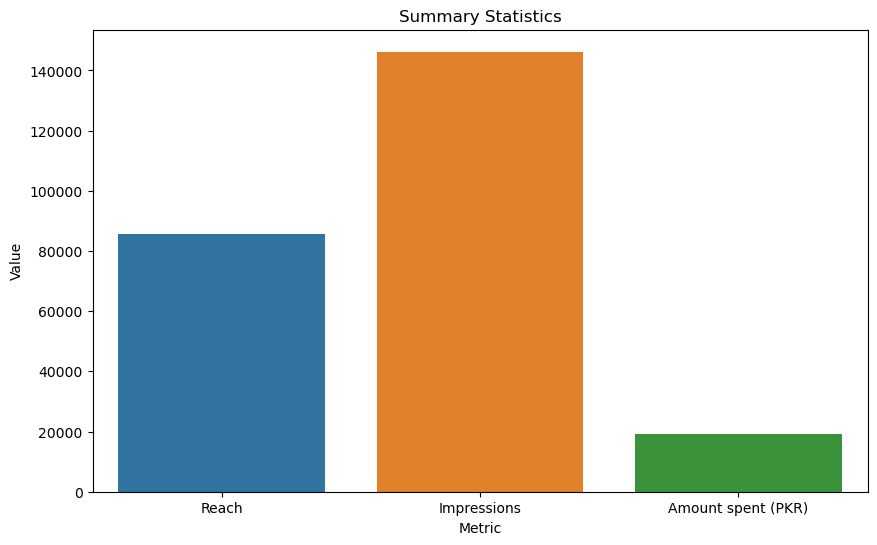

In [49]:
plt.figure(figsize=(10,6))
sns.barplot(x='Metric', y='Value', data=d_summary)
plt.title('Summary Statistics')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.ticklabel_format(style='plain', axis='y') 
plt.show()

## Impression, Reach, Link Clicks, CPC (cost per link click) and Cost per result By Adset 

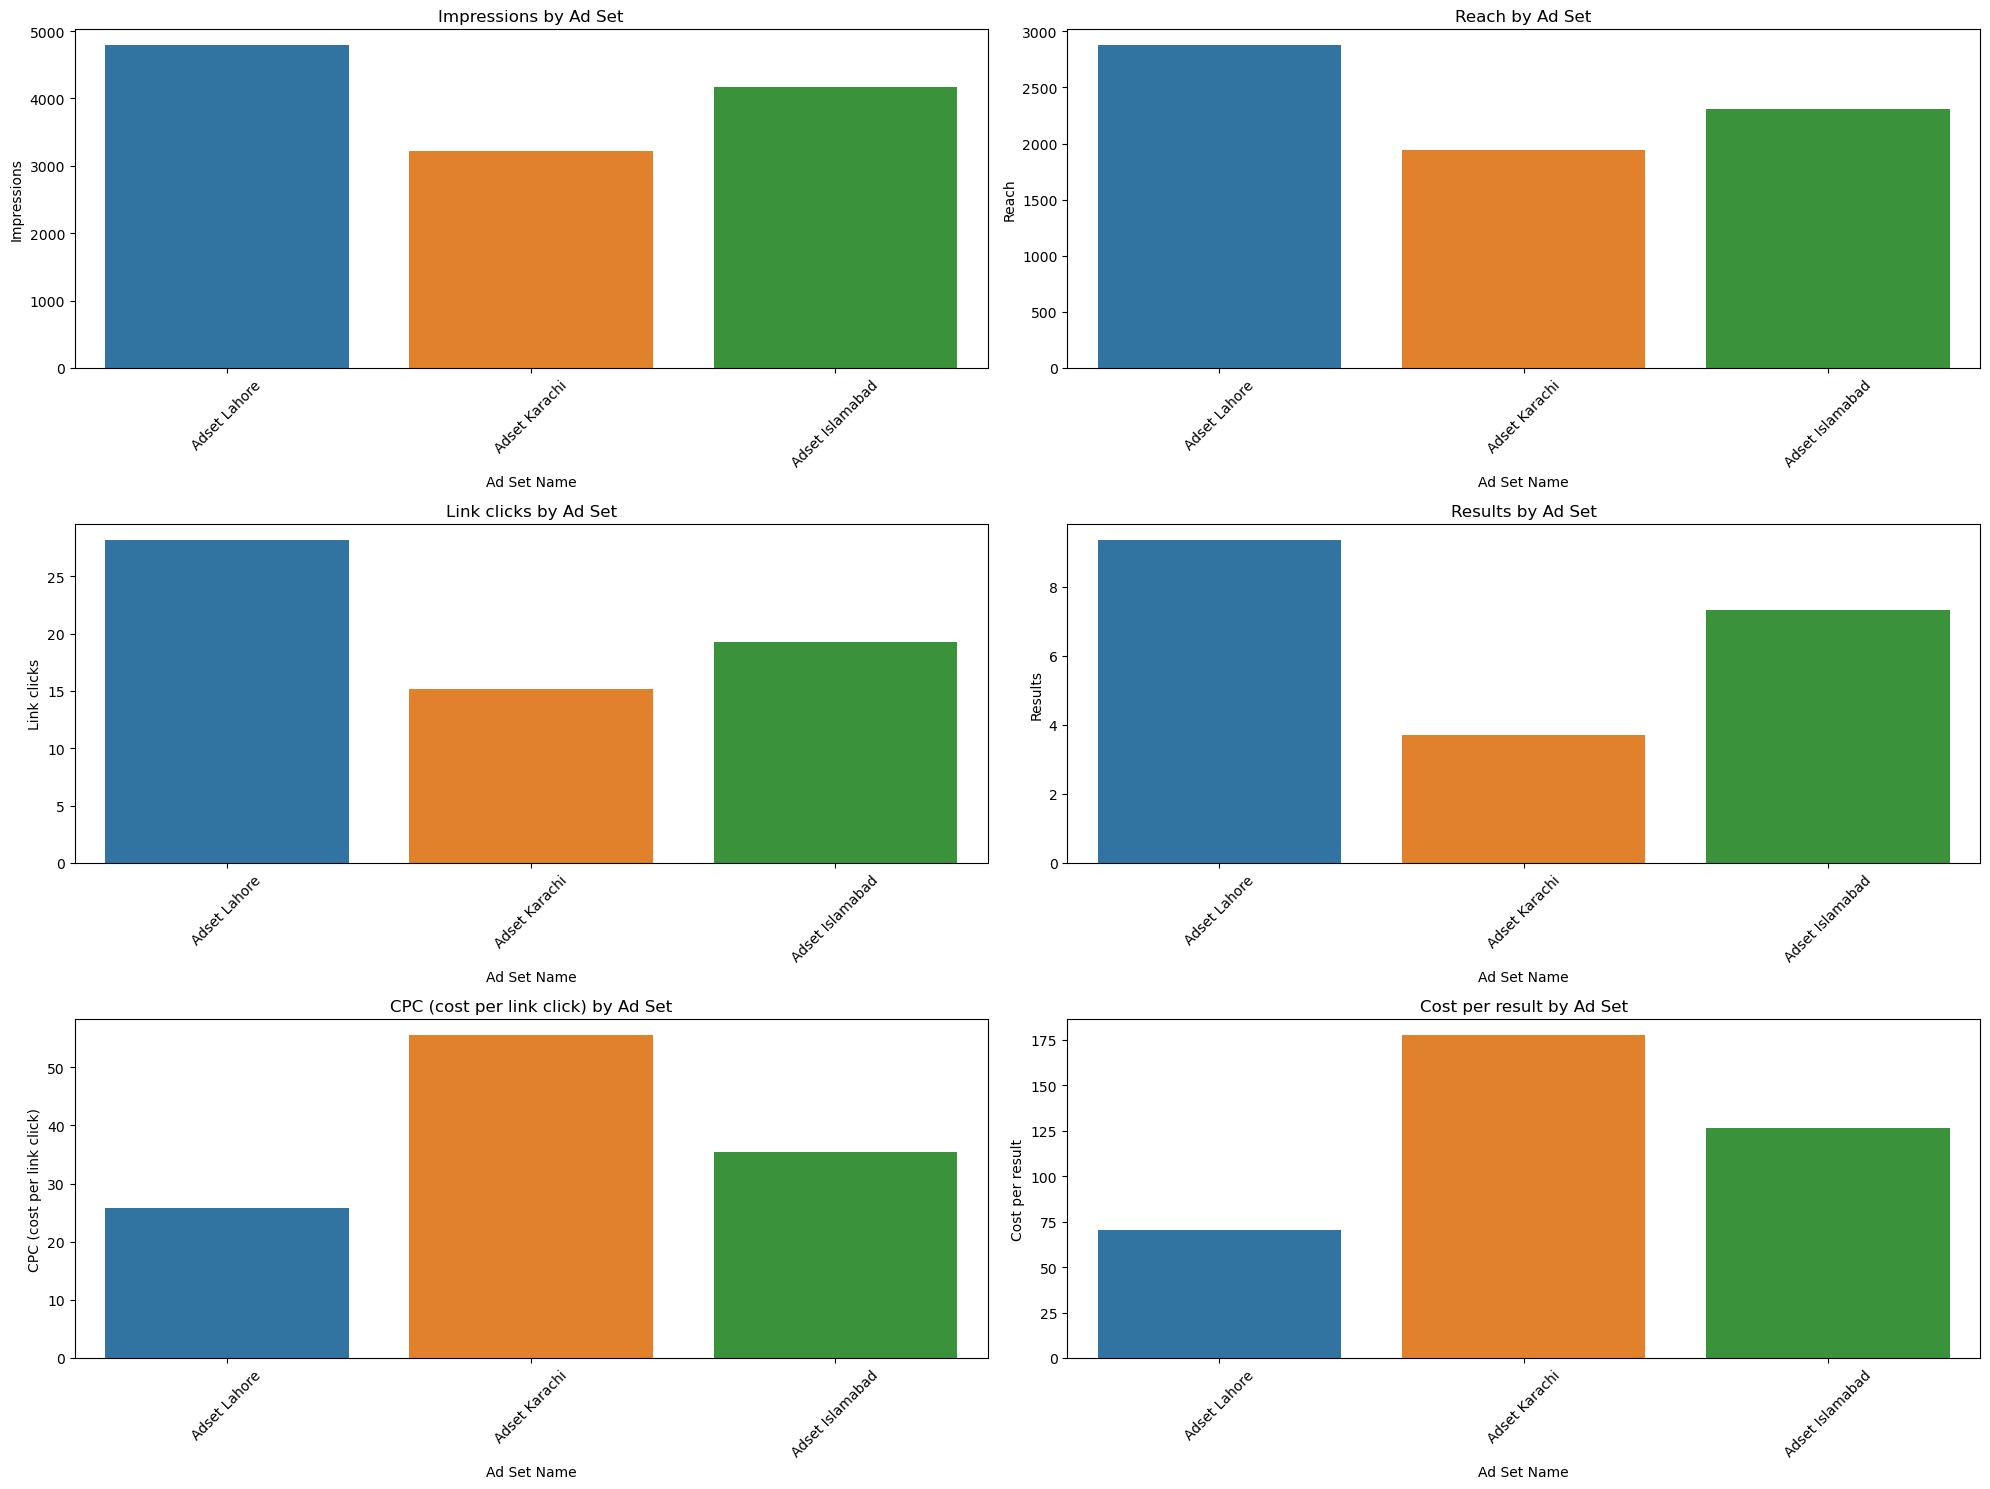

In [50]:
metrics = ['Impressions', 'Reach', 'Link clicks', 'Results', 'CPC (cost per link click)', 'Cost per result']
plt.figure(figsize=(20, 15))

for i, metric in enumerate(metrics, 1):
    plt.subplot(3, 2, i)
    sns.barplot(x='Ad set name', y=metric, errorbar = None, data=df)
    plt.title(f'{metric} by Ad Set')
    plt.xlabel('Ad Set Name')
    plt.ylabel(metric)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Impression, Reach, Link Clicks, CPC (cost per link click) and Cost per result By Age Group and Gender of Karachi Adset

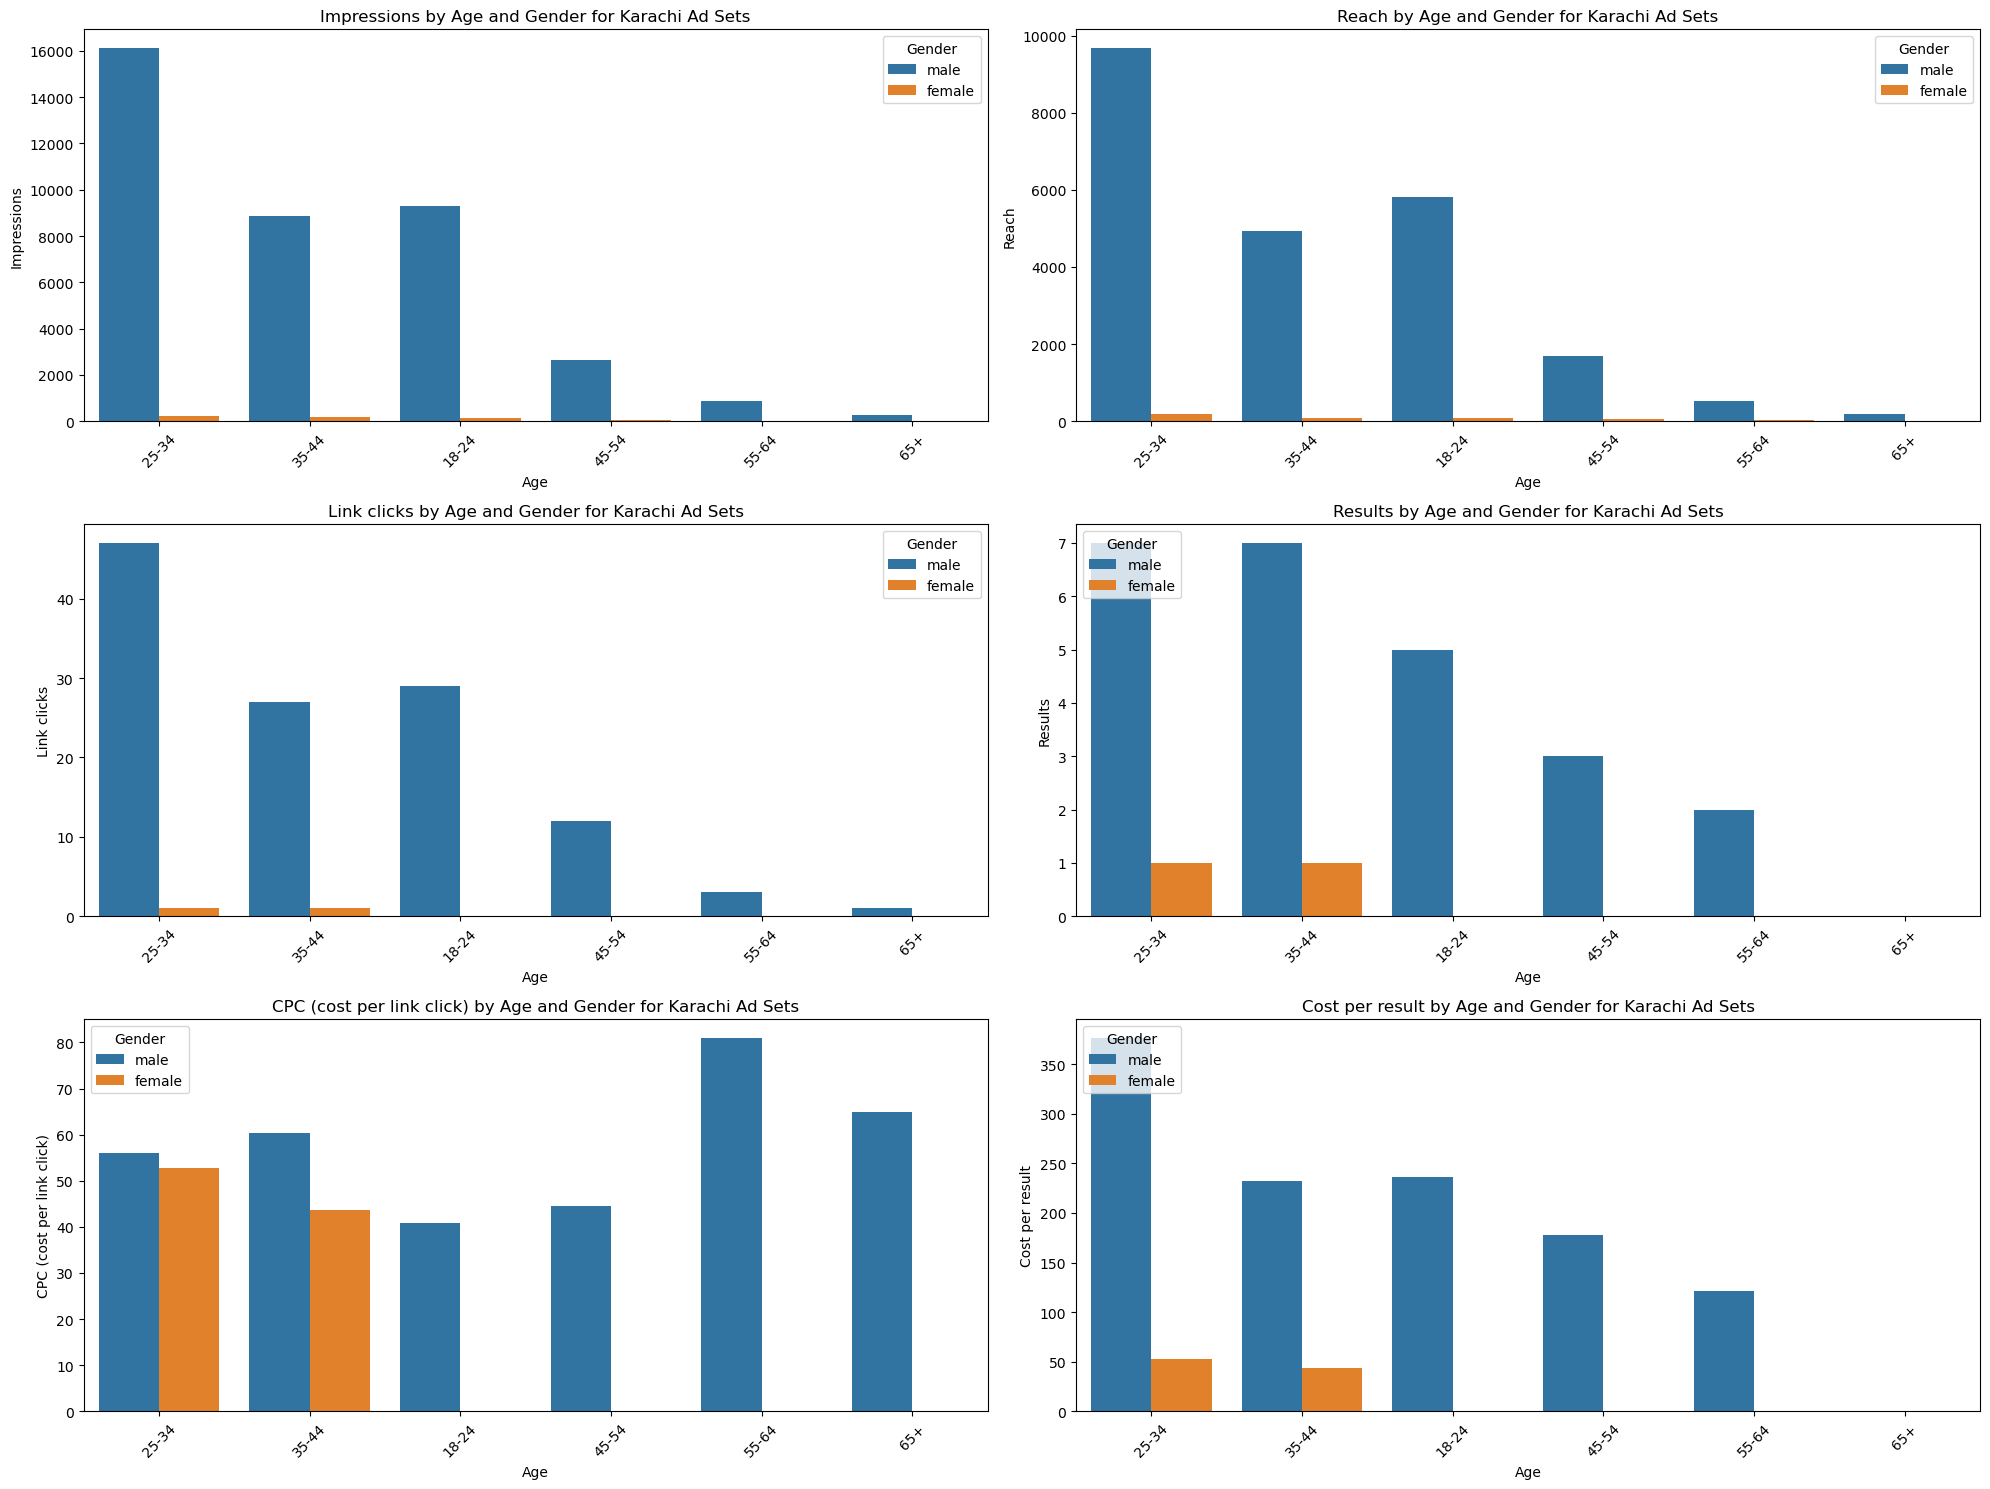

In [51]:
karachi_df = df[df['Ad set name'] == 'Adset Karachi']

metrics = ['Impressions', 'Reach', 'Link clicks', 'Results', 'CPC (cost per link click)', 'Cost per result']

plt.figure(figsize=(20, 15))

for i, metric in enumerate(metrics, 1):
    plt.subplot(3, 2, i)
    sns.barplot(x='Age', y=metric, hue='Gender', data=karachi_df, errorbar=None)
    plt.title(f'{metric} by Age and Gender for Karachi Ad Sets')
    plt.xlabel('Age')
    plt.ylabel(metric)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Impression, Reach, Link Clicks, CPC (cost per link click) and Cost per result By Age Group and Gender of Lahore Adset

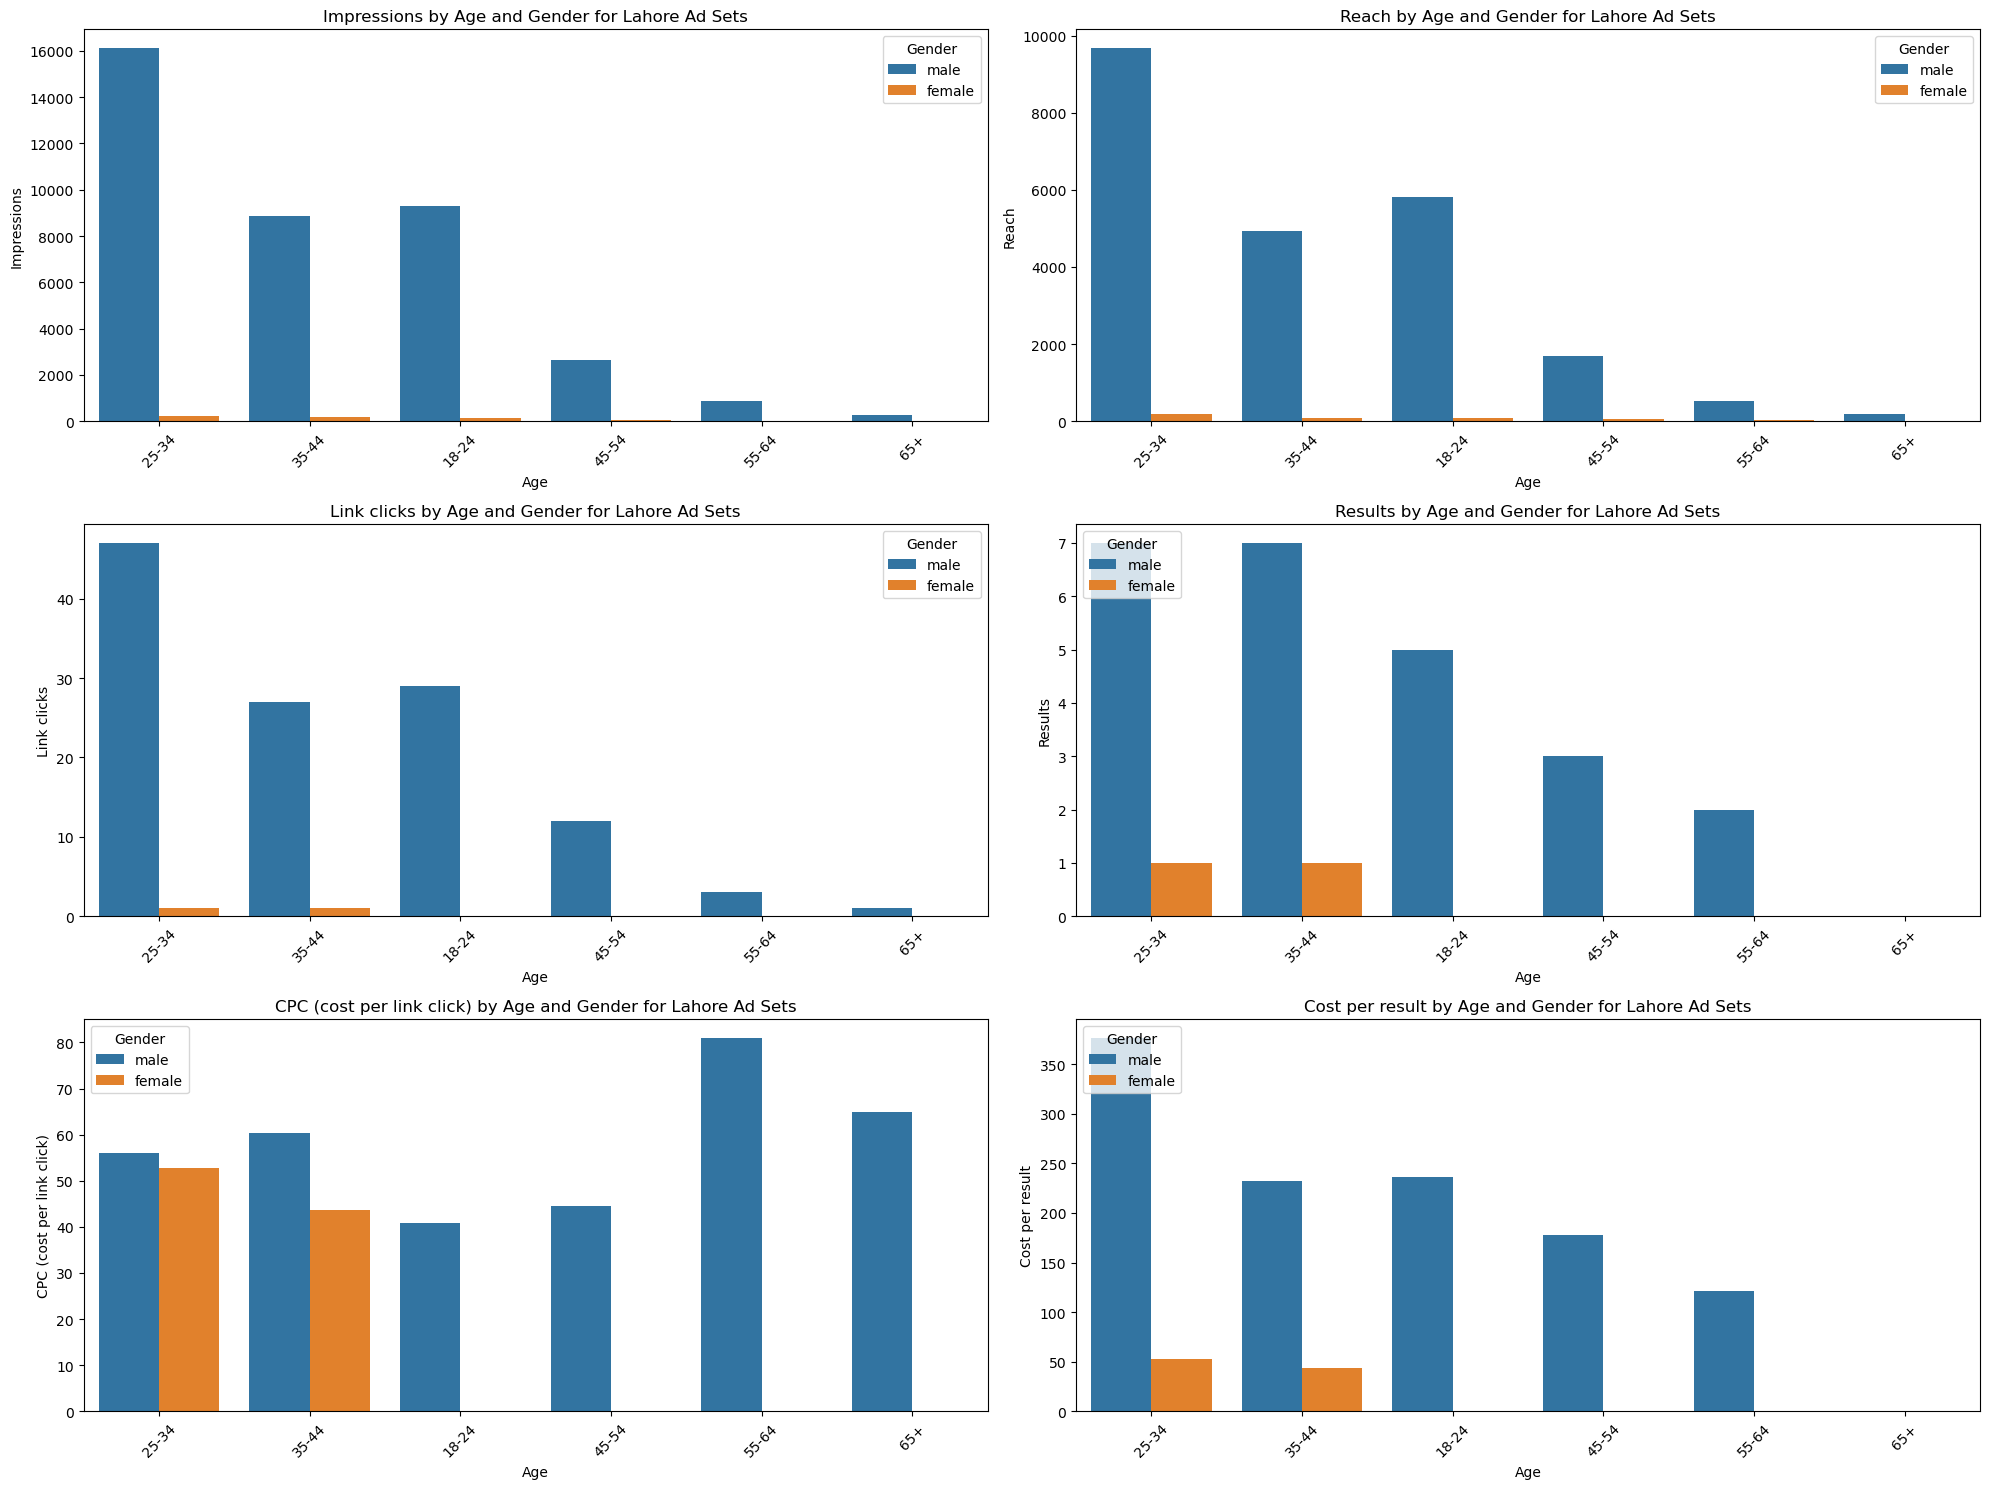

In [52]:
lahore_df = df[df['Ad set name'] == 'Adset Lahore']

metrics = ['Impressions', 'Reach', 'Link clicks', 'Results', 'CPC (cost per link click)', 'Cost per result']

plt.figure(figsize=(20, 15))

for i, metric in enumerate(metrics, 1):
    plt.subplot(3, 2, i)
    sns.barplot(x='Age', y=metric, hue='Gender', data=karachi_df, errorbar=None)
    plt.title(f'{metric} by Age and Gender for Lahore Ad Sets')
    plt.xlabel('Age')
    plt.ylabel(metric)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Impression, Reach, Link Clicks, CPC (cost per link click) and Cost per result By Age Group and Gender of Islamabad Adset

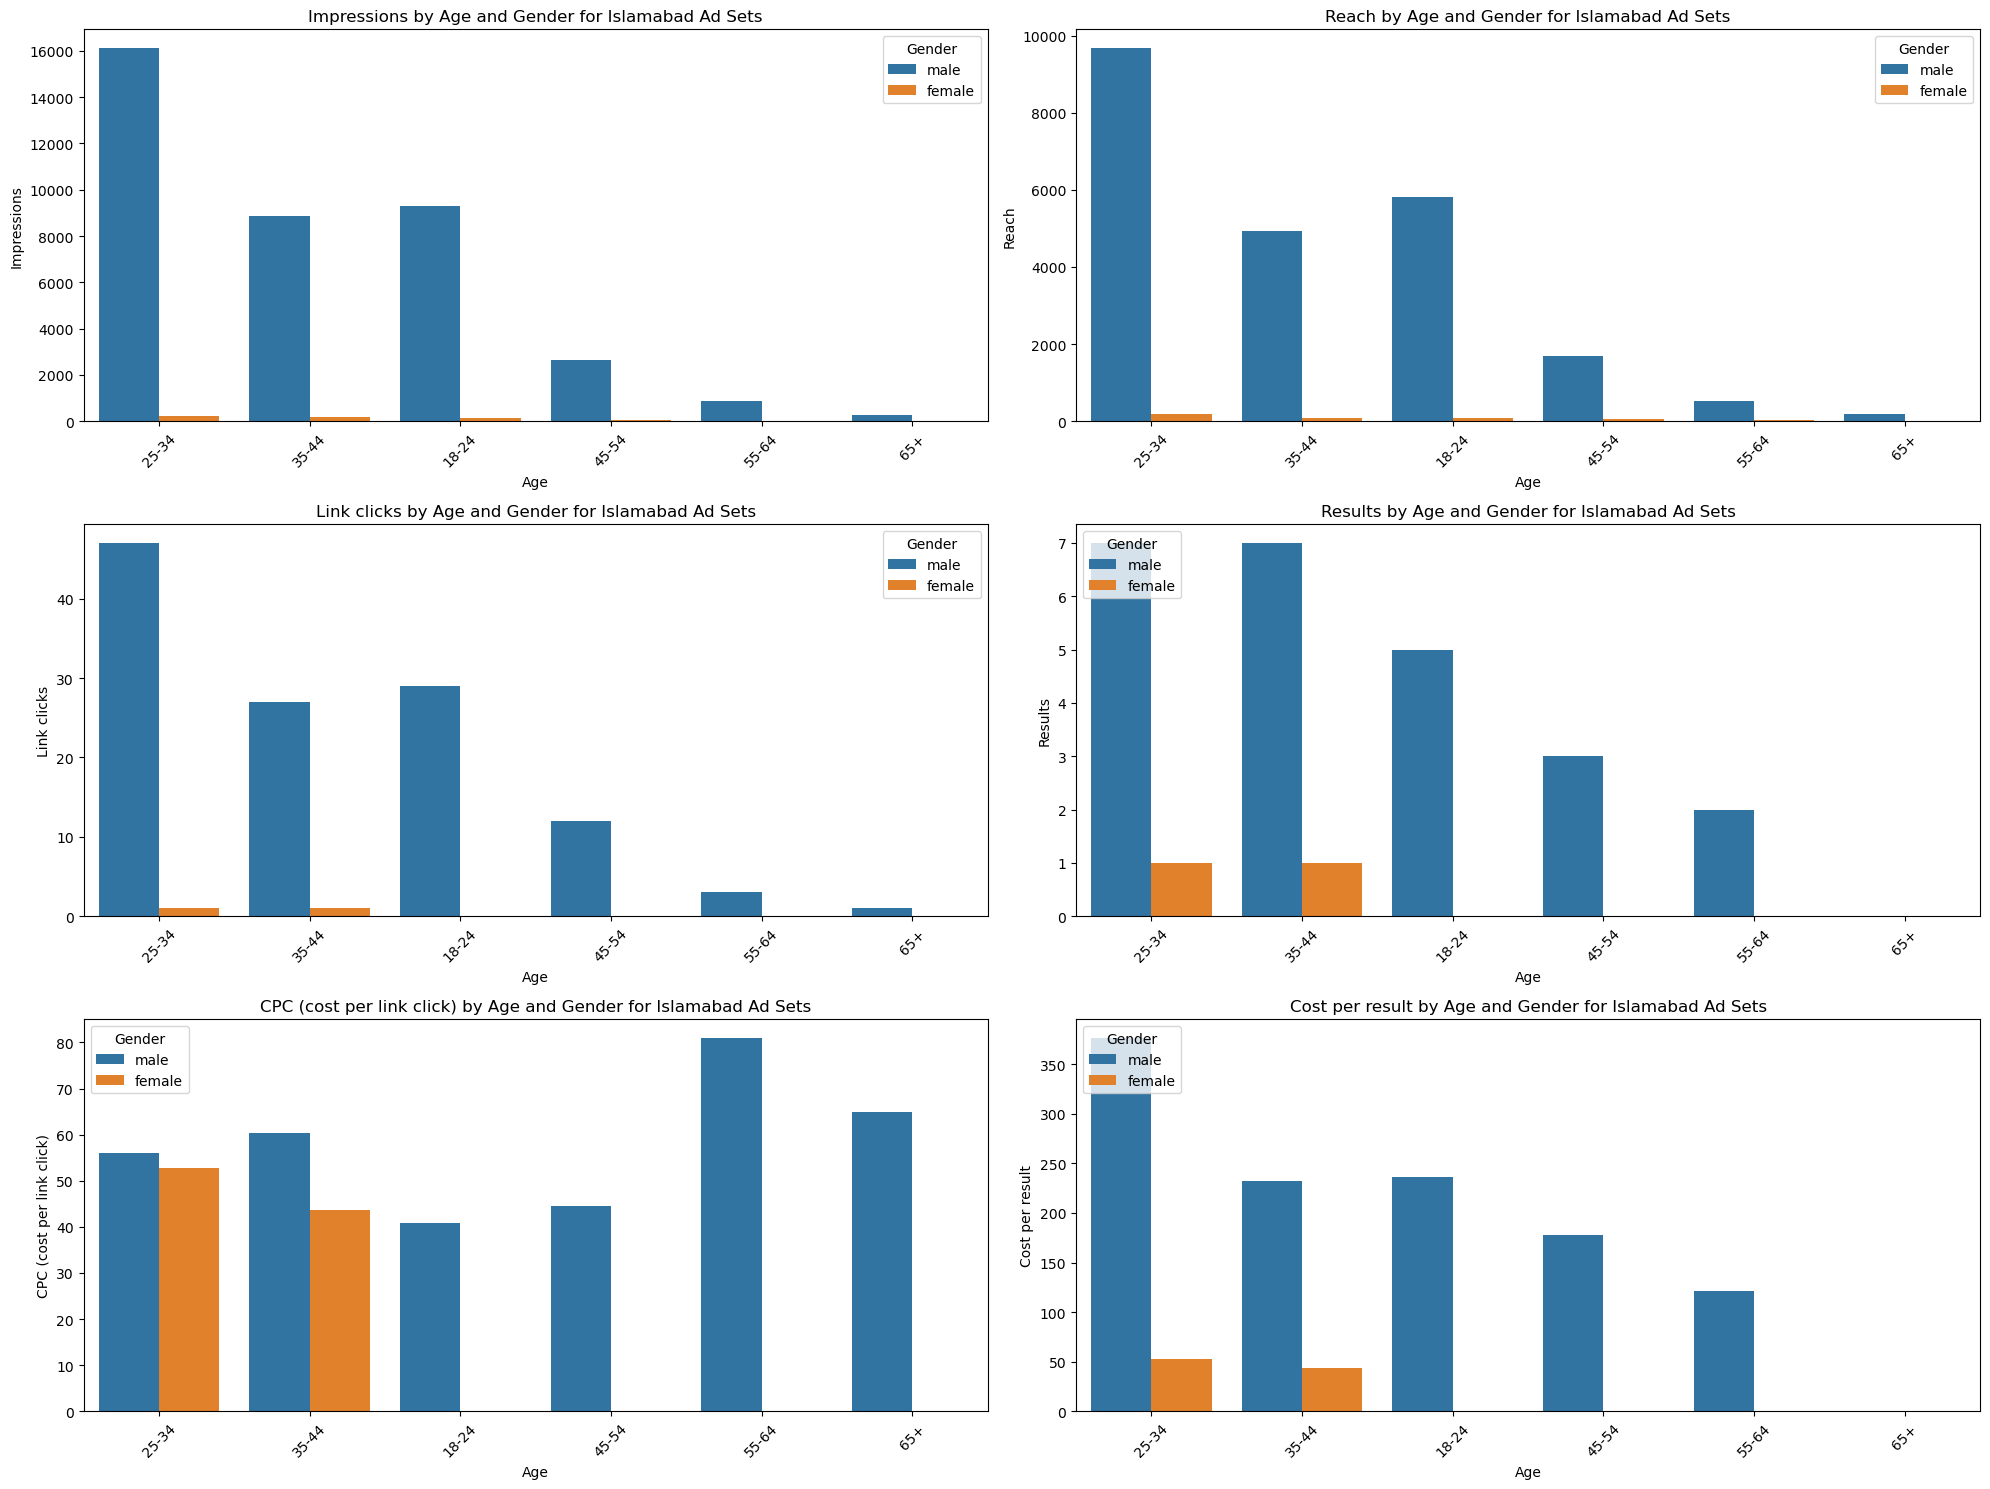

In [53]:
islamabad_df = df[df['Ad set name'] == 'Adset Islamabad']

metrics = ['Impressions', 'Reach', 'Link clicks', 'Results', 'CPC (cost per link click)', 'Cost per result']

plt.figure(figsize=(20, 15))

for i, metric in enumerate(metrics, 1):
    plt.subplot(3, 2, i)
    sns.barplot(x='Age', y=metric, hue='Gender', data=karachi_df, errorbar=None)
    plt.title(f'{metric} by Age and Gender for Islamabad Ad Sets')
    plt.xlabel('Age')
    plt.ylabel(metric)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Data Preprocessing

In [54]:
df['Age'].replace({'18-24': '1','25-34':'2','35-44':'3','45-54':'4','55-64':'5','65+':'6'},inplace=True)
df['Gender'].replace({'male': '1','female':'2'},inplace=True)
df['Ad set name'].replace({'Adset Lahore': '1','Adset Karachi':'2','Adset Islamabad':'3'},inplace=True)

C:\Users\Muslim Aqeel\AppData\Local\Temp\ipykernel_14412\3175827537.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'].replace({'18-24': '1','25-34':'2','35-44':'3','45-54':'4','55-64':'5','65+':'6'},inplace=True)
C:\Users\Muslim Aqeel\AppData\Local\Temp\ipykernel_14412\3175827537.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'].replace({'male': '1','female':'2'},inplace=True)
C:\Users\Muslim Aqeel\AppData\Local\Temp\ipykernel_14412\3175827537.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.

In [55]:
print(df.isna().sum())

Age                                  0
Gender                               0
Ad set name                          0
Reach                                0
Impressions                          0
Frequency                            0
Result Type                          0
Results                             14
Cost per result                     14
Amount spent (PKR)                   0
CPM (cost per 1,000 impressions)     0
Link clicks                         10
CPC (cost per link click)           10
CTR (link click-through rate)       10
Reporting starts                     0
Reporting ends                       0
dtype: int64


In [56]:
cleaned_data = df.dropna()

In [57]:
cleaned_data

,Age,Gender,Ad set name,Reach,Impressions,Frequency,Result Type,Results,Cost per result,Amount spent (PKR),"CPM (cost per 1,000 impressions)",Link clicks,CPC (cost per link click),CTR (link click-through rate),Reporting starts,Reporting ends
0,2,1,1,15354,25607,1.667774,Messaging conversations started,36.0,76.631864,2758.747097,107.734100,110.0,25.079519,0.429570,2024-07-11,2024-07-18
1,2,1,2,9677,16120,1.665806,Messaging conversations started,7.0,376.426943,2634.988601,163.460831,47.0,56.063587,0.291563,2024-07-11,2024-07-18
2,2,1,3,11354,21018,1.851154,Messaging conversations started,18.0,139.193729,2505.487120,119.206733,64.0,39.148236,0.304501,2024-07-11,2024-07-18
3,3,1,3,7657,13514,1.764921,Messaging conversations started,10.0,182.472342,1824.723424,135.024673,54.0,33.791175,0.399586,2024-07-11,2024-07-18
4,3,1,2,4931,8857,1.796187,Messaging conversations started,7.0,232.577969,1628.045780,183.814585,27.0,60.297992,0.304844,2024-07-11,2024-07-18
5,3,1,1,8248,13744,1.666343,Messaging conversations started,20.0,81.026630,1620.532596,117.908367,52.0,31.164088,0.378347,2024-07-11,2024-07-18
6,1,1,2,5826,9308,1.597666,Messaging conversations started,5.0,236.365096,1181.825482,126.968788,29.0,40.752603,0.311560,2024-07-11,2024-07-18
7,1,1,1,6978,12012,1.721410,Messaging conversations started,15.0,78.716471,1180.747066,98.297292,60.0,19.679118,0.499501,2024-07-11,2024-07-18
8,1,1,3,4655,8405,1.805585,Messaging conversations started,11.0,79.030330,869.333635,103.430534,30.0,28.977788,0.356930,2024-07-11,2024-07-18
9,4,1,3,2340,4288,1.832479,Messaging conversations started,3.0,236.105340,708.316020,165.185639,12.0,59.026335,0.279851,2024-07-11,2024-07-18


In [58]:
print(cleaned_data.isna().sum())

Age                                 0
Gender                              0
Ad set name                         0
Reach                               0
Impressions                         0
Frequency                           0
Result Type                         0
Results                             0
Cost per result                     0
Amount spent (PKR)                  0
CPM (cost per 1,000 impressions)    0
Link clicks                         0
CPC (cost per link click)           0
CTR (link click-through rate)       0
Reporting starts                    0
Reporting ends                      0
dtype: int64


## Predictive Modelling Using Decision Tree

In [59]:
features = ['Ad set name', 'Gender', 'Age', 'Reach', 'Impressions']
target = ['Link clicks', 'Results', 'Cost per result', 'Amount spent (PKR)']

X = cleaned_data[features]
y = cleaned_data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [60]:
print(model.score(X_test,y_test))

0.278001400659671


## Predictive Modelling Using Random Forest Regressor

In [61]:
features = ['Ad set name', 'Gender', 'Age', 'Reach', 'Impressions']
target = ['Link clicks', 'Results', 'Cost per result', 'Amount spent (PKR)']

X = cleaned_data[features]
y = cleaned_data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [62]:
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')
mae = mean_absolute_error(y_test, y_pred, multioutput='raw_values')
print("Mean Squared Error : ", mse)
print("Mean Absolute Error : ", mae)

Mean Squared Error :  [5.41417880e+02 8.86655600e+01 1.46895046e+04 4.29307549e+05]
Mean Absolute Error :  [ 13.3          5.912       91.25872985 482.2929631 ]


In [63]:
print(model.score(X_test,y_test))

0.4284726245537315


## Predictive Modelling Using MultiOutputRegressor

In [64]:
X = cleaned_data[features]
y = cleaned_data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)

multi_target_rf = MultiOutputRegressor(rf)

multi_target_rf.fit(X_train, y_train)

y_pred = multi_target_rf.predict(X_test)

y_pred

array([[5.90800000e+01, 1.73900000e+01, 9.87833789e+01, 1.96884798e+03],
       [2.72000000e+00, 2.06000000e+00, 8.31115714e+01, 1.88263262e+02],
       [2.98400000e+01, 6.19000000e+00, 2.19476446e+02, 1.33753141e+03],
       [5.74000000e+01, 1.74800000e+01, 1.58419231e+02, 1.41833327e+03],
       [2.25000000e+00, 1.66000000e+00, 5.75857947e+01, 6.82999213e+01]])

In [65]:
r2_scores = r2_score(y_test, y_pred, multioutput='raw_values')

print("R-squared scores for each target:")
for target_name, r2 in zip(target, r2_scores):
    print(f"{target_name}: {r2}")

R-squared scores for each target:
Link clicks: 0.637980997973117
Results: 0.42809490960989527
Cost per result: -0.05671503829095226
Amount spent (PKR): 0.6649846363279392


In [66]:
adset = int(input("Enter the Adset Name (1 for Lahore, 2 for Karachi, 3 for Islamabad): "))
gender = int(input("Enter Gender (0 for Female, 1 for Male): "))
age = int(input("Enter Age Group (1 for '18-24', 2 for '25-34', 3 for '35-44', 4 for '45-54', 5 for '55-64', 6 for '65+'): "))
reach = int(input("Enter Reach: "))
impressions = int(input("Enter Impressions: "))

input_data = pd.DataFrame({
    'Ad set name': [adset],
    'Gender': [gender],
    'Age': [age],
    'Reach': [reach],
    'Impressions': [impressions]
})


input_data = input_data.astype(np.float32)


predicted_values = multi_target_rf.predict(input_data)


print("Predicted Link Clicks:", predicted_values[0][0])
print("Predicted Results:", predicted_values[0][1])
print("Predicted Cost per Result:", predicted_values[0][2])
print("Predicted Amount Spent (PKR):", predicted_values[0][3])

Enter the Adset Name (1 for Lahore, 2 for Karachi, 3 for Islamabad): 2
Enter Gender (0 for Female, 1 for Male): 0
Enter Age Group (1 for '18-24', 2 for '25-34', 3 for '35-44', 4 for '45-54', 5 for '55-64', 6 for '65+'): 2
Enter Reach: 4000
Enter Impressions: 7000
Predicted Link Clicks: 25.02
Predicted Results: 6.07
Predicted Cost per Result: 219.7463896044001
Predicted Amount Spent (PKR): 1133.1074499166016
